Code: Alexis Aubel (alexis.aubel@gmail.com)

In [19]:
sim_name = [
    'SAM6108_RCE_MC_20240131_256x256_b6_I0p7',                #
    'MeanWind_Exp003_I2p0_30day_Hourly',                      #Hourly, 3D, with MFx
    'SAM6108_RCE_MC_20240131_256x256_b8_I4p0',                #
]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import Utils as utils

In [21]:
sim_nb = len(sim_name)
dataset_1D, dataset_2D = utils.import_from_name(sim_name)

In [22]:
############################################ COORDINATES ############################################
z = []
for case in range(sim_nb):
    z.append(dataset_1D[case].coords['z'].values)

In [23]:
############################################ PARAMETERS #############################################
wind_spd = []
U_target = []
for case in range(sim_nb):
    wind_spd.append(utils.extract_speed(sim_name[case]))
    U_target.append(utils.get_U_target(sim_name[case]))

In [24]:
############################################# VARIABLES #############################################
U_mean = []
for case in range(sim_nb):
    U_mean.append(np.array(dataset_1D[case]['U'])[::6,:len(z[case])])

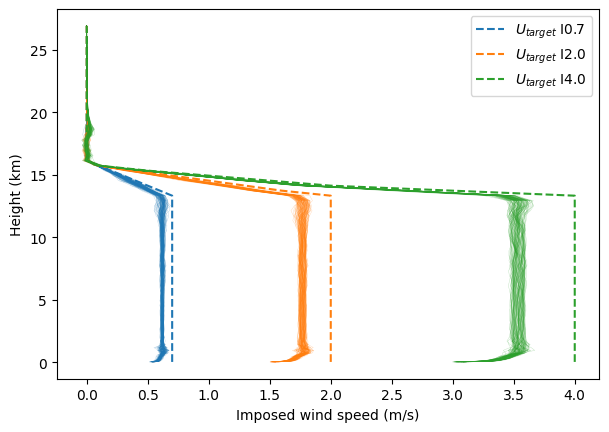

In [25]:
fig, axis = plt.subplots(1,1)
fig.set_figwidth(7)
for case in range(sim_nb):
    axis.plot(U_target[case],z[case]/1000,label="$U_{target} $ "+utils.get_sim_desc(sim_name[case]),linestyle='dashed',color="C{}".format(case),)
    for i,timeframe in enumerate(U_mean[case][6:]):
        axis.plot(timeframe, z[case]/1000, color="C{}".format(case), linewidth=.3, alpha=.3)

########################################## DISPLAY ##########################################
lgd = axis.legend()
for lh in lgd.legend_handles: 
    lh.set_alpha(1)
axis.set_xlabel("Imposed wind speed (m/s)")
axis.set_ylabel("Height (km)")
plt.show()